## **LAB 5: LÀM VIỆC VỚI BỘ DỮ LIỆU FASHION-MNIST, DÙNG THƯ VIỆN PYTORCH HUẤN LUYỆN MÔ HÌNH TRÊN GPU CỦA FIT-LAB**

In [20]:
import os
import zipfile

# Giải nén dataset
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Giải nén train và test datasets
with zipfile.ZipFile('data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train')

with zipfile.ZipFile('data/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('data/test')

In [21]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Định nghĩa các phép biến đổi ảnh
transform = transforms.Compose([
    transforms.Resize((128, 128)), # Thay đổi kích thước ảnh thành 128x128
    transforms.ToTensor(), # Chuyển ảnh thành tensor
])

# Tạo dataset và dataloader cho tập huấn luyện
train_dataset = datasets.ImageFolder(root='data/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [22]:
# Tạo dataset và dataloader cho tập kiểm tra
test_dataset = datasets.ImageFolder(root='data/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [23]:
# Duyệt qua data loader
for batch_idx, (images, labels) in enumerate(train_loader):
    # Xử lý từng batch dữ liệu    
    print(f'Batch {batch_idx + 1}:')
    print(f'Kích thước batch: {images.size(0)}')  # Kích thước của batch
    print(f'Kích thước hình ảnh: {images.shape[1:]}')  # Kích thước của từng hình ảnh trong batch
    print(f'Kích thước nhãn: {labels.shape}')  # Kích thước của nhãn trong batch

    # Tùy chọn, bạn có thể in ra nhãn của từng hình ảnh trong batch
    for i, label in enumerate(labels):
        print(f'Nhãn của hình ảnh {i}: {label}')

    # Dừng sau khi duyệt qua batch đầu tiên
    if batch_idx == 0:
        break

Batch 1:
Kích thước batch: 64
Kích thước hình ảnh: torch.Size([3, 128, 128])
Kích thước nhãn: torch.Size([64])
Nhãn của hình ảnh 0: 0
Nhãn của hình ảnh 1: 0
Nhãn của hình ảnh 2: 0
Nhãn của hình ảnh 3: 0
Nhãn của hình ảnh 4: 0
Nhãn của hình ảnh 5: 0
Nhãn của hình ảnh 6: 0
Nhãn của hình ảnh 7: 0
Nhãn của hình ảnh 8: 0
Nhãn của hình ảnh 9: 0
Nhãn của hình ảnh 10: 0
Nhãn của hình ảnh 11: 0
Nhãn của hình ảnh 12: 0
Nhãn của hình ảnh 13: 0
Nhãn của hình ảnh 14: 0
Nhãn của hình ảnh 15: 0
Nhãn của hình ảnh 16: 0
Nhãn của hình ảnh 17: 0
Nhãn của hình ảnh 18: 0
Nhãn của hình ảnh 19: 0
Nhãn của hình ảnh 20: 0
Nhãn của hình ảnh 21: 0
Nhãn của hình ảnh 22: 0
Nhãn của hình ảnh 23: 0
Nhãn của hình ảnh 24: 0
Nhãn của hình ảnh 25: 0
Nhãn của hình ảnh 26: 0
Nhãn của hình ảnh 27: 0
Nhãn của hình ảnh 28: 0
Nhãn của hình ảnh 29: 0
Nhãn của hình ảnh 30: 0
Nhãn của hình ảnh 31: 0
Nhãn của hình ảnh 32: 0
Nhãn của hình ảnh 33: 0
Nhãn của hình ảnh 34: 0
Nhãn của hình ảnh 35: 0
Nhãn của hình ảnh 36: 0
Nhãn của hì

In [24]:
# In thông tin tổng quan về dữ liệu
print(f'Batch size: {images.shape[0]}')
print(f'Image size: {images.shape[1:]}')
print(f'Number of unique classes: {len(train_dataset.classes)}')
print(f'Class names: {train_dataset.classes}')

Batch size: 64
Image size: torch.Size([3, 128, 128])
Number of unique classes: 1
Class names: ['train']


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

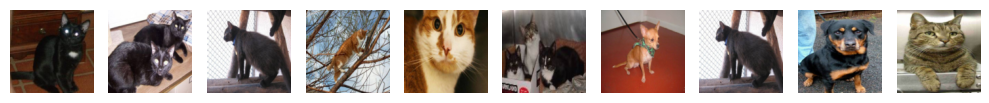

In [26]:
# Hiển thị hình ảnh từ batch đầu tiên
R, C = len(train_dataset.classes), 10  # Số hàng bằng số lớp, số cột = 10

# Tạo figure và axes
fig, ax = plt.subplots(R, C, figsize=(10, 10))

# Lặp qua từng lớp
for label_class in range(R):  # Vòng lặp qua số lượng lớp
    # Lấy các chỉ số của nhãn tương ứng
    label_x_rows = np.where(labels == label_class)[0]
    
    # Lặp qua từng ô trong hàng hiện tại
    for j in range(C):  # Vòng lặp qua số lượng cột
        plot_cell = ax[label_class * C + j]  # Chọn subplot tương ứng
        plot_cell.grid(False)
        plot_cell.axis('off')
        
        # Chọn ngẫu nhiên một hình ảnh từ nhãn hiện tại
        ix = np.random.choice(label_x_rows)
        x, y = images[ix], labels[ix]
        
        # Hiển thị hình ảnh trong ô hiện tại với màu xám
        plot_cell.imshow(x.permute(1, 2, 0), cmap='gray')  # permute để chuyển chiều của hình ảnh

plt.tight_layout()
plt.show()

In [27]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [28]:
# Kiểm tra xem GPU có sẵn không
device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
# Định nghĩa lớp Dataset tuỳ chỉnh
class dogcat(Dataset):
    def __init__(self, x, y):
            x = x.float()
            x = x.view(-1,28*28)
            self.x, self.y = x, y
def __getitem__(self, ix):
    x, y = self.x[ix], self.y[ix]
    return x.to(device), y.to(device)
def __len__(self):
    return len(self.x)

In [30]:
#Lấy dữ liệu
def get_data():
        train = dogcat(tr_images, tr_targets)
        trn_dl = DataLoader(train, batch_size=64, shuffle=True) # Batch size = 64
        return trn_dl

In [31]:
from torch.optim import SGD
# Định nghĩa mô hình
def get_model():
    model = nn.Sequential(
    nn.Linear(28 * 28, 1000),
    nn.ReLU(),
    nn.Linear(1000, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

In [32]:
# Hàm huấn luyện batch
def train_batch(x, y, model, opt, loss_fn):
    model.train()  # Đặt mô hình vào chế độ huấn luyện
# Gọi mô hình với batch input
    prediction = model(x)
# Tính toán loss
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward() # Tính gradient
    optimizer.step() # Cập nhật trọng số
    optimizer.zero_grad() # Xoá gradient cũ
    return batch_loss.item()

In [33]:
@torch.no_grad()
# Hàm tính độ chính xác
def accuracy(x, y, model):
    model.eval()  # Đặt mô hình vào chế độ đánh giá
 # Lấy dự đoán
    prediction = model(x)
# Tìm chỉ số của giá trị lớn nhất
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y  # So sánh với giá trị thật
    return is_correct.cpu().numpy().tolist()

In [34]:
# Định nghĩa mô hình CNN đơn giản
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 classes: Cat and Dog

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 32 * 32)  # Flatten tensor thành vector
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [35]:
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    return batch_loss.item()

In [36]:
def accuracy(x, y, model):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
        is_correct = (torch.argmax(prediction, dim=1) == y).float()
    return is_correct.numpy()


In [37]:
import torch.optim as optim
# Khởi tạo mô hình, hàm mất mát và bộ tối ưu hóa
model = SimpleCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình với số epoch = 250
losses, accuracies = [], []
for epoch in range(250): # Số epoch = 250
    print(f"Epoch {epoch + 1}/{250}")
    
    epoch_losses, epoch_accuracies = [], []

Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 35/250
Epoch 36/250
Epoch 37/250
Epoch 38/250
Epoch 39/250
Epoch 40/250
Epoch 41/250
Epoch 42/250
Epoch 43/250
Epoch 44/250
Epoch 45/250
Epoch 46/250
Epoch 47/250
Epoch 48/250
Epoch 49/250
Epoch 50/250
Epoch 51/250
Epoch 52/250
Epoch 53/250
Epoch 54/250
Epoch 55/250
Epoch 56/250
Epoch 57/250
Epoch 58/250
Epoch 59/250
Epoch 60/250
Epoch 61/250
Epoch 62/250
Epoch 63/250
Epoch 64/250
Epoch 65/250
Epoch 66/250
Epoch 67/250
Epoch 68/250
Epoch 69/250
Epoch 70/250
Epoch 71/250
Epoch 72/250
Epoch 73/250
Epoch 74/250
Epoch 75/250
Epoch 76/250
Epoch 77/250
Epoch 78

In [38]:
for ix, batch in enumerate(train_loader):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    epoch_losses.append(batch_loss)
    
epoch_loss = np.array(epoch_losses).mean()
    